In [2]:
import pandas as pd
import statistics
from matplotlib import pyplot as plt

import numpy as np
import sklearn.linear_model as skl
from sklearn.metrics import r2_score

from scipy import stats as st

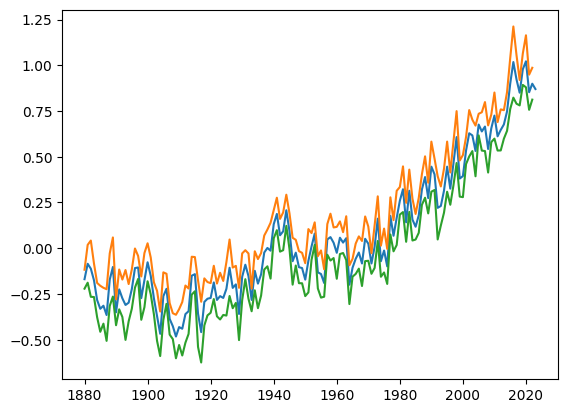

In [10]:
totale = pd.read_csv("/home/francesco/Codici/Computazionale/dc0/GLB.Ts+dSST.csv" , header = 1)
col = ['Year',"Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
totale[col] = totale[col].apply(pd.to_numeric, errors = 'coerce')

#Anni
Anni = totale['Year']

#medie per ano
totale.drop(['Year' , 'J-D' , 'DJF' , 'MAM' , 'JJA' , 'SON' , 'D-N'] , axis = 1 , inplace= True)
medie = totale.mean(axis = 1 , skipna= True , numeric_only= True)

#devstd
devstd = totale.T.std()

#DataFrame
totale = {'Year' : Anni , 'Median' : medie  , 'Devstd' : devstd}
Nasa = pd.DataFrame(totale)

plt.plot(Nasa['Year'] , Nasa['Median'] )
plt.plot(Nasa['Year'] , Nasa['Median'] + Nasa['Devstd'] )
plt.plot(Nasa['Year'] , Nasa['Median'] - Nasa['Devstd'] )

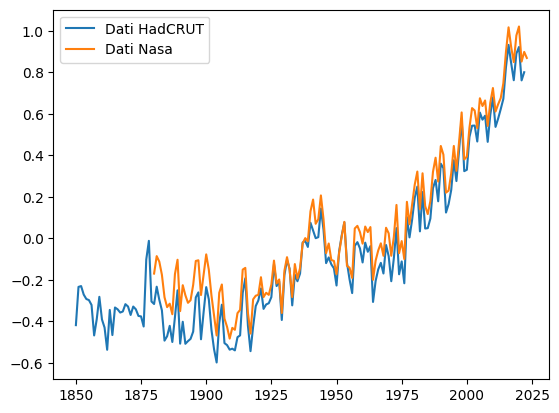

In [6]:
Had = pd.read_csv("/home/francesco/Codici/Computazionale/dc0/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.csv" , header = 0)

plt.plot(Had['Time'] , Had['Anomaly (deg C)'], label = "Dati HadCRUT")
plt.plot(Nasa['Year'] , Nasa['Median'] , label = "Dati Nasa")
plt.legend()

In [7]:
def regressione(data) :
    X = np.zeros((len(data['Median']) , 2))
    X[:,0] = 1
    X[:,1] = data['Year']
    clf = skl.LinearRegression().fit(X , data['Median'])
    fity = clf.predict(X)
    devstd = r2_score(data['Median'] , fity)

    result = [fity , devstd]
    return result

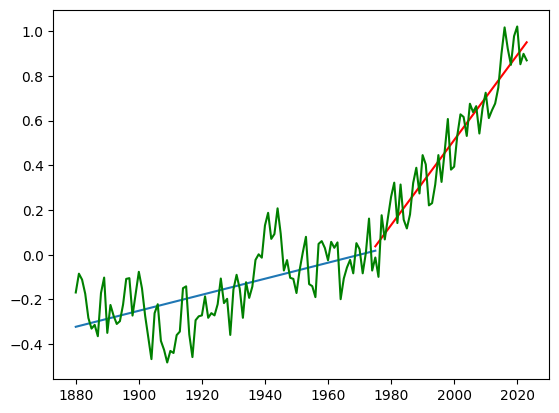

In [8]:
filtro_post = Nasa[Nasa['Year'] < 1975].index
filtro_pre = Nasa[Nasa['Year'] > 1975].index

post_1975 = Nasa.drop(filtro_post)
pre_1975 = Nasa.drop(filtro_pre)

fit_post = regressione(post_1975)
fit_pre = regressione(pre_1975)


plt.plot(post_1975['Year'] , fit_post[0] , c = 'r')
plt.plot(pre_1975['Year'] , fit_pre[0])
plt.plot(Nasa['Year'] , Nasa['Median'] , c = 'g')

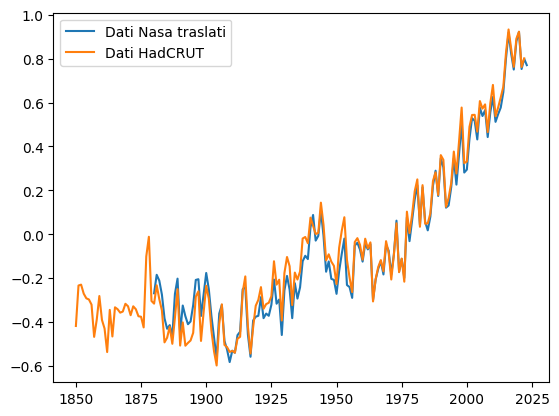

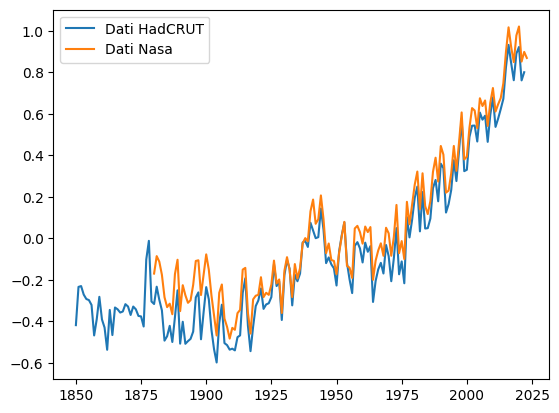

In [16]:
#cerco di mettere la stessa media di Had
filtro_post = Nasa[Nasa['Year'] < 1961].index
filtro_pre = Nasa[Nasa['Year'] > 1990].index

dati_medi = Nasa.drop(filtro_pre)
dati_medi.drop(filtro_post, inplace= True)

plt.plot(Nasa['Year'] , Nasa['Median'] - dati_medi['Median'].mean() , label = "Dati Nasa traslati")
plt.plot(Had['Time'] , Had['Anomaly (deg C)'], label = "Dati HadCRUT")
plt.legend()
plt.show()

plt.plot(Had['Time'] , Had['Anomaly (deg C)'], label = "Dati HadCRUT")
plt.plot(Nasa['Year'] , Nasa['Median'] , label = "Dati Nasa")
plt.legend()
plt.show()


In [17]:
Nasa_traslati = Nasa
Nasa_traslati['Median'] = Nasa_traslati['Median'] - dati_medi['Median'].mean()